In [1]:
#HALF WED, HALF FRI

#TODO: Include weather data in dataset
#TODO: Add custom callbacks (Model Checkpoint and Early Stopping and learning rate)
#TODO: Check current model hyperparams (Gridsearch-like process)

#Plot prediction !!!!!!!!!!! (true vs test + train) (HYBRID+SVR)
#weather points -> TURBIDITY -> fine tune model

#TRAINING MAE 

#Phil sent script for solar enegrgy


#SCALE HYBRID DATA

#Don't put day into traning
#Cehck for outliers in weather
#Read how much past data affects cellcount/turbidity (suggest-lag of 6 (1hr 30 mins))

#plot train + test together time order
#add cross validation k fold (5 folds)
#RMSE metric
#SAVE RESULTS OF PREDICTION


#__________________________________________
#set out setions in final report

#save graphs (do weather test and no weather test) EMAIL PPT TO MAIRA AND RACHEL AND PRINT

In [2]:
import numpy as np
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error


import tensorflow.keras as keras

In [3]:
df = pd.read_csv(os.path.join("data", "final_df.csv"))

In [4]:
df['Date 2'] = pd.to_datetime(df['Date 2']) 
df['Day'] = (df['Date 2'] - df['Date 2'].min())  / np.timedelta64(1,'D')
df_no_date = df.drop(columns=['Date 1', 'Date 2', 'Date'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(df_no_date.drop(columns=['cell count']), df_no_date['cell count'], test_size=0.2, random_state=1)

df_no_date


,cell count,Absorbance,pH,Temperature (C),D.O. (mg/L),Turbidity (NTU),NO3-N (mg/L),NH4-N (mg/L),ORP (MV),Conductivity (mS/cm),Total COD (mg/L),Soluable COD (mg/L),max_temp,min_temp,max_lux,ave_lux,total_rain,Day
0,102.0,0.64,6.74,15.99,9.84,107.16,11.96,23.50,147.27,0.92,447,257,20.2,14.2,568.7,188.546875,8.6,0.000000
1,88.8,0.55,6.85,17.49,10.77,94.29,13.54,23.55,148.10,0.78,378,66,21.1,15.9,1032.2,227.014583,30.4,1.000000
2,99.1,0.58,6.98,12.96,11.48,97.10,17.28,27.97,133.23,0.80,354,66,23.5,12.3,1163.5,397.067708,1.8,2.000000
3,99.0,0.57,7.06,12.25,11.86,99.01,20.19,32.24,122.15,0.82,357,57,19.4,9.6,1502.3,461.630208,0.0,3.000000
4,92.2,0.60,6.94,11.69,11.69,99.58,23.18,32.94,122.98,0.84,374,57,21.9,6.6,1690.0,560.932292,0.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,117.0,0.20,9.28,19.37,13.71,116.58,5.86,17.11,-20.89,1.14,324,38,25.9,19.0,1455.7,703.503390,0.0,249.007639
130,174.0,0.27,9.35,20.12,13.81,121.21,6.28,17.49,-19.10,1.25,367,33,28.0,18.6,2118.0,845.129167,8.0,251.008333
131,132.0,0.28,8.23,15.84,13.06,106.86,24.77,0.10,34.29,2.36,243,58,28.7,20.4,2013.5,883.084375,0.0,312.005556
132,89.8,0.19,7.54,17.08,5.96,65.34,21.20,1.44,178.29,2.59,170,79,29.0,22.4,2096.2,911.820833,0.0,342.003472


In [5]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.values)
x_test_scaled = scaler.transform(x_test.values)

In [6]:
svr_classifier = SVR()
svr_classifier.fit(x_train_scaled, y_train)
svr_prediction = svr_classifier.predict(x_test_scaled)

In [7]:
mean_squared_error(y_test, svr_prediction)

950.3240736112176

In [8]:
"""
params = [{
    'kernel': ["poly", "rbf", "sigmoid"],
    'gamma': ["scale", "auto"]    
}]


estimator = GridSearchCV(SVR(), params, scoring='r2', return_train_score=True)
estimator.fit(x_train_scaled, y_train)
best_params = estimator.best_params_

print(best_params)

print(estimator.best_score_)
"""
#OUTPUT
#{'gamma': 'scale', 'kernel': 'poly'}
#0.38909959034873987

'\nparams = [{\n    \'kernel\': ["poly", "rbf", "sigmoid"],\n    \'gamma\': ["scale", "auto"]    \n}]\n\n\nestimator = GridSearchCV(SVR(), params, scoring=\'r2\', return_train_score=True)\nestimator.fit(x_train_scaled, y_train)\nbest_params = estimator.best_params_\n\nprint(best_params)\n\nprint(estimator.best_score_)\n'

In [9]:
x_train_arr = np.array(x_train, np.float32)
x_test_arr = np.array(x_test, np.float32)

x_train_shaped = x_train_arr.reshape(x_train_arr.shape[0], 1, x_train_arr.shape[1])
x_test_shaped = x_test_arr.reshape(x_test_arr.shape[0], 1, x_test_arr.shape[1])

In [10]:
model = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[None, x_train_shaped.shape[2]]),
    keras.layers.GRU(144, return_sequences=True, activation='relu'),
    keras.layers.Reshape(target_shape=(12,12)),
    keras.layers.Conv1D(filters=128, kernel_size=4, strides=1, padding='same',activation='relu'),
    keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    keras.layers.MaxPooling1D((2), strides=None),
    keras.layers.AveragePooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8, ),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 100)         35700     
                                                                 
 gru_1 (GRU)                 (None, None, 144)         106272    
                                                                 
 reshape (Reshape)           (None, 12, 12)            0         
                                                                 
 conv1d (Conv1D)             (None, 12, 128)           6272      
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            32832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                        

In [11]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00010),  
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()]
        )

In [12]:
history = model.fit(x_train_shaped,y_train,epochs=200)


Epoch 1/200
4/4 [==============================] - 3s 5ms/step - loss: 11320.8447 - root_mean_squared_error: 106.3995
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 11281.1787 - root_mean_squared_error: 106.2129
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 11245.5225 - root_mean_squared_error: 106.0449
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 11209.6084 - root_mean_squared_error: 105.8754
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 11171.0840 - root_mean_squared_error: 105.6934
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 11128.9131 - root_mean_squared_error: 105.4937
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 11082.3477 - root_mean_squared_error: 105.2727
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 11027.7969 - root_mean_squared_error: 105.0133
Epoch 9/200
4/4 [==============================] - 0s 5m

4/4 [==============================] - 0s 4ms/step - loss: 1184.6976 - root_mean_squared_error: 34.4194
Epoch 71/200
4/4 [==============================] - 0s 4ms/step - loss: 1159.1632 - root_mean_squared_error: 34.0465
Epoch 72/200
4/4 [==============================] - 0s 5ms/step - loss: 1139.6008 - root_mean_squared_error: 33.7580
Epoch 73/200
4/4 [==============================] - 0s 4ms/step - loss: 1127.9708 - root_mean_squared_error: 33.5853
Epoch 74/200
4/4 [==============================] - 0s 4ms/step - loss: 1120.1823 - root_mean_squared_error: 33.4691
Epoch 75/200
4/4 [==============================] - 0s 4ms/step - loss: 1107.9941 - root_mean_squared_error: 33.2865
Epoch 76/200
4/4 [==============================] - 0s 4ms/step - loss: 1105.1021 - root_mean_squared_error: 33.2431
Epoch 77/200
4/4 [==============================] - 0s 4ms/step - loss: 1069.3789 - root_mean_squared_error: 32.7014
Epoch 78/200
4/4 [==============================] - 0s 5ms/step - loss: 1048.

4/4 [==============================] - 0s 5ms/step - loss: 475.7908 - root_mean_squared_error: 21.8126
Epoch 141/200
4/4 [==============================] - 0s 5ms/step - loss: 466.5385 - root_mean_squared_error: 21.5995
Epoch 142/200
4/4 [==============================] - 0s 5ms/step - loss: 462.6310 - root_mean_squared_error: 21.5089
Epoch 143/200
4/4 [==============================] - 0s 5ms/step - loss: 456.9308 - root_mean_squared_error: 21.3759
Epoch 144/200
4/4 [==============================] - 0s 5ms/step - loss: 451.4857 - root_mean_squared_error: 21.2482
Epoch 145/200
4/4 [==============================] - 0s 5ms/step - loss: 447.1317 - root_mean_squared_error: 21.1455
Epoch 146/200
4/4 [==============================] - 0s 5ms/step - loss: 442.2660 - root_mean_squared_error: 21.0301
Epoch 147/200
4/4 [==============================] - 0s 4ms/step - loss: 443.7059 - root_mean_squared_error: 21.0643
Epoch 148/200
4/4 [==============================] - 0s 5ms/step - loss: 455.0

In [13]:
test_eval = model.evaluate(x_test_shaped, y_test)

1/1 [==============================] - 0s 438ms/step - loss: 632.0305 - root_mean_squared_error: 25.1402


In [14]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

In [15]:
history.history.keys()
test_loss = test_eval[0]
test_rmse = test_eval[1]

now = dt.datetime.now().strftime("%Y-%m-%d %H-%M")

In [16]:
def check_file(fpath):
    return os.path.exists(fpath)

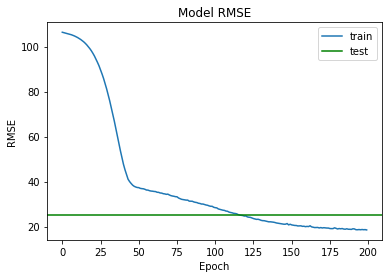

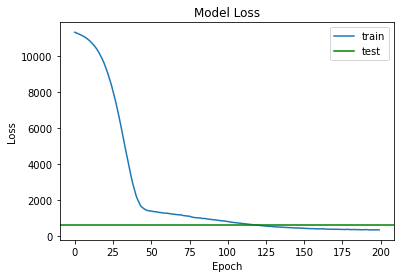

In [17]:
plt.plot(history.history['root_mean_squared_error'], label='train')
plt.axhline(test_eval[1], color='g', label='test')
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model RMSE vs Epoch" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

plt.plot(history.history['loss'], label='train')
plt.axhline(test_eval[0], color='g', label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model Loss vs Epoch" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

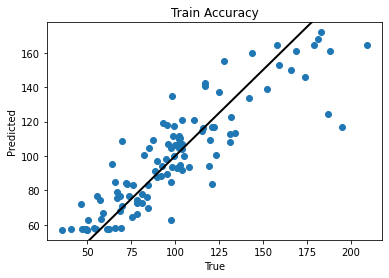

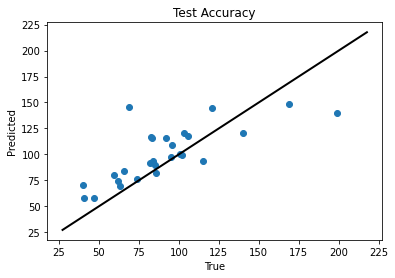

In [18]:

pred_train = model.predict(x_train_shaped)

plt.plot(y_train, pred_train, marker='o', linestyle = 'None')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, color='k', lw=2, scalex=False, scaley=False)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Train Accuracy")
fpath = os.path.join("plots", now + " Train Acc Predicted vs True" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

pred_test = model.predict(x_test_shaped)
plt.plot(y_test, pred_test, marker='o', linestyle = 'None')
plt.plot(xpoints, ypoints, color='k', lw=2, scalex=False, scaley=False)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Test Accuracy")
fpath = os.path.join("plots", now + " Test Acc Predicted vs True" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

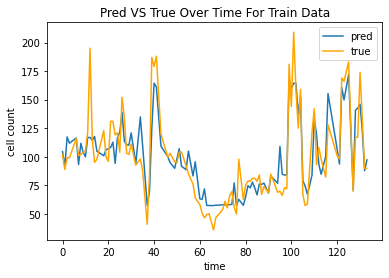

In [19]:
sort_train = x_train
sort_train['pred_train'] = pred_train
sort_train['y_train'] = y_train
sort_train = sort_train.sort_index()

plt.plot(sort_train['pred_train'], label='pred')
plt.plot(sort_train['y_train'], color='orange', label='true')
plt.title('Pred VS True Over Time For Train Data')
plt.ylabel('cell count')
plt.xlabel('time')
plt.legend()
fpath = os.path.join("plots", now + " Train Acc Predicted and True vs Time" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()


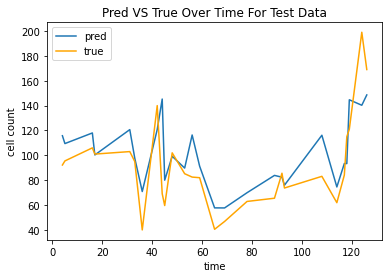

In [20]:
sort_test = x_test
sort_test['pred_test'] = pred_test
sort_test['y_test'] = y_test
sort_test = sort_test.sort_index()

plt.plot(sort_test['pred_test'], label='pred')
plt.plot(sort_test['y_test'],color='orange', label='true')
plt.title('Pred VS True Over Time For Test Data')
plt.ylabel('cell count')
plt.xlabel('time')
plt.legend()
fpath = os.path.join("plots", now + " Test Acc Predicted and True vs Time" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

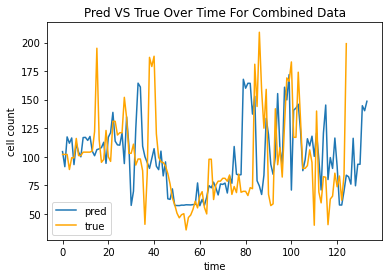

In [21]:
pred_df = pd.merge(sort_train.rename(columns={'pred_train': 'combined_pred'})['combined_pred'], sort_test.rename(columns={'pred_test': 'combined_pred'})['combined_pred'], how='outer')
true_df = pd.merge(sort_train.rename(columns={'y_train': 'combined_true'})['combined_true'], sort_test.rename(columns={'y_test': 'combined_true'})['combined_true'], how='outer')


plt.plot(pred_df['combined_pred'], label='pred')
plt.plot(true_df['combined_true'], color='orange', label='true')
plt.title('Pred VS True Over Time For Combined Data')
plt.ylabel('cell count')
plt.xlabel('time')
plt.legend()
fpath = os.path.join("plots", now + " Combined Acc Predicted and True vs Time" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

